In [82]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
import matplotlib as mpl
import pandas as pd
import seaborn as sns

In [83]:
nmtraffic = pd.read_csv('Transportation/NM_VMTbyRoadSegment_byVehicleType_2018_April2020.csv')

In [84]:
nmtraffic.head()

,Route,Beg_MP,End_MP,Length,LOCAL_ID,FUNCCODE,POP_CODE,AADT,AADT_MC_Class 1,AADT_PC_Class 2,...,VMT_Bus_Class 4,VMT_SU_Class 5,VMT_SU_Class 6,VMT_SU_Class 7,VMT_CT_Class 8,VMT_CT_Class 9,VMT_CT_Class 10,VMT_CT_Class 11,VMT_CT_Class 12,VMT_CT_Class 13
0,BIA1001P,0.000,4.365,4.365,3700901.000,6.000,R,340,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,BIA1004P,0.000,2.742,2.742,50917.000,6.000,R,322,9,169,...,5.484,30.160,10.967,0.000,13.709,30.160,2.742,0.000,2.742,2.742
2,BIA10P,0.000,13.298,13.298,21302.000,6.000,R,311,8,162,...,26.596,146.278,53.192,0.000,53.192,146.278,13.298,0.000,13.298,13.298
3,BIA110P,0.000,2.725,2.725,21302.000,6.000,R,311,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,BIA1P,0.000,1.304,1.304,51634.000,6.000,U,340,10,177,...,2.609,15.654,5.218,0.000,6.522,15.654,1.304,0.000,1.304,1.304


In [85]:
cols = nmtraffic.columns

In [86]:
vmt_cols = cols[cols.str.contains('VMT')]
vmt_cols = list(vmt_cols)
print(vmt_cols)

['VMT_MC_Class 1', 'VMT_PC_Class 2', 'VMT_LT_Class 3', 'VMT_Bus_Class 4', 'VMT_SU_Class 5', 'VMT_SU_Class 6', 'VMT_SU_Class 7', 'VMT_CT_Class 8', 'VMT_CT_Class 9', 'VMT_CT_Class 10', 'VMT_CT_Class 11', 'VMT_CT_Class 12', 'VMT_CT_Class 13']


In [87]:
nmtraffic = nmtraffic[vmt_cols]

In [88]:
nmtraffic

,VMT_MC_Class 1,VMT_PC_Class 2,VMT_LT_Class 3,VMT_Bus_Class 4,VMT_SU_Class 5,VMT_SU_Class 6,VMT_SU_Class 7,VMT_CT_Class 8,VMT_CT_Class 9,VMT_CT_Class 10,VMT_CT_Class 11,VMT_CT_Class 12,VMT_CT_Class 13
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,24.676,463.366,296.116,5.484,30.160,10.967,0.000,13.709,30.160,2.742,0.000,2.742,2.742
2,106.384,2154.273,1409.586,26.596,146.278,53.192,0.000,53.192,146.278,13.298,0.000,13.298,13.298
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,13.045,230.895,150.017,2.609,15.654,5.218,0.000,6.522,15.654,1.304,0.000,1.304,1.304
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80708,25.738,974.320,454.130,12.011,72.066,12.011,5.148,32.315,92.370,10.295,3.432,8.579,5.148
80709,9.944,334.100,155.794,4.696,29.418,4.696,1.795,13.535,37.015,4.005,1.243,3.039,1.795
80710,15.233,454.539,212.372,7.393,44.132,7.393,3.136,19.938,55.333,5.601,2.464,4.032,2.464
80711,14.733,439.603,205.394,7.150,42.682,7.150,3.033,19.283,53.515,5.417,2.383,3.900,2.383


In [89]:
nmtraffic.columns = [column.replace('VMT_','') for column in nmtraffic]

In [90]:
#nmtraffic['FUNCCODE'].replace({1.0: 'Interstate', 2.0: 'Freeway/Expressway', 3.0: 'Other Principal Arterial', 4.0: 'Minor Arterial', 5.0: 'Major Collector', 6.0: 'Minor Collector', 7.0: 'Local Road or Street'}, inplace=True)

In [91]:
nmtraffic = nmtraffic.sum()

In [92]:
nmemissions = pd.DataFrame({'Vehicle Type':nmtraffic.index, 'VMT':nmtraffic.values}).set_index('Vehicle Type')

In [93]:
nmemissions['VMT'] = nmemissions['VMT'] * 365

In [94]:
nmemissions

,VMT
Vehicle Type,
MC_Class 1,500671097.952
PC_Class 2,14835948331.447
LT_Class 3,4613420965.682
Bus_Class 4,128410934.243
SU_Class 5,661854184.120
SU_Class 6,163876364.213
SU_Class 7,49914087.086
CT_Class 8,274192097.120
CT_Class 9,841601827.728


In [95]:
mapping = {
    'MC_Class 1': 'Motorcycles',
    'PC_Class 2': 'Light-duty vehicles',
    'LT_Class 3': 'Light-duty trucks',
    'Bus_Class 4': 'Heavy-duty vehicles',
    'SU_Class 5': 'Heavy-duty vehicles',
    'SU_Class 6': 'Heavy-duty vehicles',
    'SU_Class 7': 'Heavy-duty vehicles',
    'CT_Class 8': 'Heavy-duty vehicles',
    'CT_Class 9': 'Heavy-duty vehicles',
    'CT_Class 10': 'Heavy-duty vehicles',
    'CT_Class 11': 'Heavy-duty vehicles',
    'CT_Class 12': 'Heavy-duty vehicles',
    'CT_Class 13': 'Heavy-duty vehicles'
    }

In [96]:
emissionfactors = pd.read_csv('Transportation/USDOT_BTS_USAvgMobileSourceEmissionFactors_HCcoNOXpm25_byVehicleType_April2020.csv')

In [97]:
emissionfactors

,Fuel Type,Vehicle Type,pollutant,emissions (grams/mile)
0,gasoline,Light-duty vehicles,Total HC,0.350
1,gasoline,Light-duty vehicles,Exhaust CO,3.941
2,gasoline,Light-duty vehicles,Exhaust NOx,0.289
3,gasoline,Light-duty vehicles,Exhaust PM2.5,0.008
4,gasoline,Light-duty vehicles,Brakewear PM2.5,0.003
5,gasoline,Light-duty vehicles,Tirewear PM2.5,0.001
6,gasoline,Light-duty vehicles,Co2,362.800
7,gasoline,Light-duty trucks,Total HC,0.421
8,gasoline,Light-duty trucks,Exhaust CO,5.655
9,gasoline,Light-duty trucks,Exhaust NOx,0.478


In [98]:
pollutants = ['HC', 'CO', 'NOx', 'PM2.5', 'Co2']

In [99]:
pollutants

['HC', 'CO', 'NOx', 'PM2.5', 'Co2']

In [100]:
for fuel in np.unique(emissionfactors['Fuel Type']):
    for pollutant in np.unique(emissionfactors['pollutant']):
        nmemissions[fuel+'_'+pollutant] = np.zeros(nmemissions.shape[0])

In [101]:
nmemissions

,VMT,both_Brakewear PM2.5,both_Co2,both_Exhaust CO,both_Exhaust NOx,both_Exhaust PM2.5,both_Tirewear PM2.5,both_Total HC,diesel_Brakewear PM2.5,diesel_Co2,...,diesel_Exhaust PM2.5,diesel_Tirewear PM2.5,diesel_Total HC,gasoline_Brakewear PM2.5,gasoline_Co2,gasoline_Exhaust CO,gasoline_Exhaust NOx,gasoline_Exhaust PM2.5,gasoline_Tirewear PM2.5,gasoline_Total HC
Vehicle Type,,,,,,,,,,,,,,,,,,,,,
MC_Class 1,500671097.952,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
PC_Class 2,14835948331.447,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
LT_Class 3,4613420965.682,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Bus_Class 4,128410934.243,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
SU_Class 5,661854184.120,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
SU_Class 6,163876364.213,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
SU_Class 7,49914087.086,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CT_Class 8,274192097.120,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CT_Class 9,841601827.728,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [102]:
emissionfactors

,Fuel Type,Vehicle Type,pollutant,emissions (grams/mile)
0,gasoline,Light-duty vehicles,Total HC,0.350
1,gasoline,Light-duty vehicles,Exhaust CO,3.941
2,gasoline,Light-duty vehicles,Exhaust NOx,0.289
3,gasoline,Light-duty vehicles,Exhaust PM2.5,0.008
4,gasoline,Light-duty vehicles,Brakewear PM2.5,0.003
5,gasoline,Light-duty vehicles,Tirewear PM2.5,0.001
6,gasoline,Light-duty vehicles,Co2,362.800
7,gasoline,Light-duty trucks,Total HC,0.421
8,gasoline,Light-duty trucks,Exhaust CO,5.655
9,gasoline,Light-duty trucks,Exhaust NOx,0.478


In [103]:
for ind in nmemissions.index:
    vehicle_type = mapping[ind]
    for fuel in np.unique(emissionfactors['Fuel Type']):
        for pollutant in np.unique(emissionfactors['pollutant']):
            row = np.logical_and(np.logical_and(emissionfactors['Fuel Type'] == fuel, 
               emissionfactors['pollutant'] == pollutant),
               emissionfactors['Vehicle Type'] == vehicle_type
              )
            if np.sum(row) == 0:
                nmemissions.loc[ind][fuel+'_'+pollutant] = np.nan
            else:
                assert(np.sum(row) == 1)
                nmemissions.loc[ind][fuel+'_'+pollutant] = emissionfactors.loc[row]['emissions (grams/mile)']
            

In [104]:
nmemissions

,VMT,both_Brakewear PM2.5,both_Co2,both_Exhaust CO,both_Exhaust NOx,both_Exhaust PM2.5,both_Tirewear PM2.5,both_Total HC,diesel_Brakewear PM2.5,diesel_Co2,...,diesel_Exhaust PM2.5,diesel_Tirewear PM2.5,diesel_Total HC,gasoline_Brakewear PM2.5,gasoline_Co2,gasoline_Exhaust CO,gasoline_Exhaust NOx,gasoline_Exhaust PM2.5,gasoline_Tirewear PM2.5,gasoline_Total HC
Vehicle Type,,,,,,,,,,,,,,,,,,,,,
MC_Class 1,500671097.952,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,0.001,199.545,13.580,0.719,0.024,0.001,2.544
PC_Class 2,14835948331.447,nan,nan,nan,nan,nan,nan,nan,0.003,314.132,...,0.004,0.001,0.183,0.003,362.800,3.941,0.289,0.008,0.001,0.350
LT_Class 3,4613420965.682,nan,nan,nan,nan,nan,nan,nan,0.003,434.438,...,0.045,0.002,0.324,0.003,501.714,5.655,0.478,0.010,0.001,0.421
Bus_Class 4,128410934.243,nan,nan,nan,nan,nan,nan,nan,0.013,1436.988,...,0.213,0.004,0.645,0.009,1659.735,21.352,1.416,0.030,0.002,1.160
SU_Class 5,661854184.120,nan,nan,nan,nan,nan,nan,nan,0.013,1436.988,...,0.213,0.004,0.645,0.009,1659.735,21.352,1.416,0.030,0.002,1.160
SU_Class 6,163876364.213,nan,nan,nan,nan,nan,nan,nan,0.013,1436.988,...,0.213,0.004,0.645,0.009,1659.735,21.352,1.416,0.030,0.002,1.160
SU_Class 7,49914087.086,nan,nan,nan,nan,nan,nan,nan,0.013,1436.988,...,0.213,0.004,0.645,0.009,1659.735,21.352,1.416,0.030,0.002,1.160
CT_Class 8,274192097.120,nan,nan,nan,nan,nan,nan,nan,0.013,1436.988,...,0.213,0.004,0.645,0.009,1659.735,21.352,1.416,0.030,0.002,1.160
CT_Class 9,841601827.728,nan,nan,nan,nan,nan,nan,nan,0.013,1436.988,...,0.213,0.004,0.645,0.009,1659.735,21.352,1.416,0.030,0.002,1.160


In [105]:
for i in pollutants:
    nmemissions[str(i)] = np.zeros(nmemissions.shape[0])

In [106]:
diesel_cols = list(nmemissions.columns[nmemissions.columns.str.contains('diesel')])
diesel_cols

['diesel_Brakewear PM2.5',
 'diesel_Co2',
 'diesel_Exhaust CO',
 'diesel_Exhaust NOx',
 'diesel_Exhaust PM2.5',
 'diesel_Tirewear PM2.5',
 'diesel_Total HC']

In [107]:
gasoline_cols = list(nmemissions.columns[nmemissions.columns.str.contains('gasoline')])
gasoline_cols

['gasoline_Brakewear PM2.5',
 'gasoline_Co2',
 'gasoline_Exhaust CO',
 'gasoline_Exhaust NOx',
 'gasoline_Exhaust PM2.5',
 'gasoline_Tirewear PM2.5',
 'gasoline_Total HC']

In [108]:
for ind in nmemissions.index:
    vehicle_type = mapping[ind]
    for i in pollutants:
        diesel_ef = [k for k in diesel_cols if str(i) in k]
        gas_ef = [k for k in gasoline_cols if str(i) in k]
        if vehicle_type == 'Heavy-duty vehicles':
            nmemissions.loc[ind][str(i)] = ((nmemissions.loc[ind]['VMT'] * .894*1.013 * nmemissions.loc[ind][diesel_ef].sum()) + (nmemissions.loc[ind]['VMT'] * .106 * nmemissions.loc[ind][gas_ef].sum()))/1000000
        elif vehicle_type == 'Light-duty trucks':
            nmemissions.loc[ind][str(i)] = ((nmemissions.loc[ind]['VMT'] * .045*1.013 * nmemissions.loc[ind][diesel_ef].sum()) + (nmemissions.loc[ind]['VMT'] * .955 * nmemissions.loc[ind][gas_ef].sum()))/1000000
        elif vehicle_type == 'Light-duty vehicles':
            nmemissions.loc[ind][str(i)] = ((nmemissions.loc[ind]['VMT'] * .06*1.013 * nmemissions.loc[ind][diesel_ef].sum()) + (nmemissions.loc[ind]['VMT'] * .94 * nmemissions.loc[ind][gas_ef].sum()))/1000000
        elif vehicle_type == 'Motorcycles':
            nmemissions.loc[ind][str(i)] = (nmemissions.loc[ind]['VMT'] * nmemissions.loc[ind][gas_ef].sum())/1000000

In [109]:
nmemissions = nmemissions.reset_index()

In [110]:
nmemissions

,Vehicle Type,VMT,both_Brakewear PM2.5,both_Co2,both_Exhaust CO,both_Exhaust NOx,both_Exhaust PM2.5,both_Tirewear PM2.5,both_Total HC,diesel_Brakewear PM2.5,...,gasoline_Exhaust CO,gasoline_Exhaust NOx,gasoline_Exhaust PM2.5,gasoline_Tirewear PM2.5,gasoline_Total HC,HC,CO,NOx,PM2.5,Co2
0,MC_Class 1,500671097.952,nan,nan,nan,nan,nan,nan,nan,nan,...,13.580,0.719,0.024,0.001,2.544,1273.707,6799.114,359.983,13.017,99906.414
1,PC_Class 2,14835948331.447,nan,nan,nan,nan,nan,nan,nan,0.003,...,3.941,0.289,0.008,0.001,0.350,5046.043,57361.668,4168.298,174.563,5342795.047
2,LT_Class 3,4613420965.682,nan,nan,nan,nan,nan,nan,nan,0.003,...,5.655,0.478,0.010,0.001,0.421,1922.987,25494.069,2383.791,72.197,2301823.607
3,Bus_Class 4,128410934.243,nan,nan,nan,nan,nan,nan,nan,0.013,...,21.352,1.416,0.030,0.002,1.160,90.798,522.520,713.652,27.305,189701.455
4,SU_Class 5,661854184.120,nan,nan,nan,nan,nan,nan,nan,0.013,...,21.352,1.416,0.030,0.002,1.160,467.988,2693.166,3678.298,140.736,977757.091
5,SU_Class 6,163876364.213,nan,nan,nan,nan,nan,nan,nan,0.013,...,21.352,1.416,0.030,0.002,1.160,115.875,666.833,910.754,34.847,242094.529
6,SU_Class 7,49914087.086,nan,nan,nan,nan,nan,nan,nan,0.013,...,21.352,1.416,0.030,0.002,1.160,35.294,203.107,277.401,10.614,73738.074
7,CT_Class 8,274192097.120,nan,nan,nan,nan,nan,nan,nan,0.013,...,21.352,1.416,0.030,0.002,1.160,193.877,1115.721,1523.840,58.304,405063.946
8,CT_Class 9,841601827.728,nan,nan,nan,nan,nan,nan,nan,0.013,...,21.352,1.416,0.030,0.002,1.160,595.085,3424.581,4677.257,178.957,1243298.259
9,CT_Class 10,84554502.935,nan,nan,nan,nan,nan,nan,nan,0.013,...,21.352,1.416,0.030,0.002,1.160,59.787,344.063,469.917,17.980,124912.355


In [111]:
# for i in cols:
#     nmemissions[str(i) + '_grams'] = nmemissions[str(i)] * nmemissions['VMT']

In [137]:
pollutants_nmemissions = nmemissions[pollutants]
nmemissions_normalized = pollutants_nmemissions / pollutants_nmemissions.sum()
pollutants_nmemissions

,HC,CO,NOx,PM2.5,Co2
0,1273.707,6799.114,359.983,13.017,99906.414
1,5046.043,57361.668,4168.298,174.563,5342795.047
2,1922.987,25494.069,2383.791,72.197,2301823.607
3,90.798,522.520,713.652,27.305,189701.455
4,467.988,2693.166,3678.298,140.736,977757.091
5,115.875,666.833,910.754,34.847,242094.529
6,35.294,203.107,277.401,10.614,73738.074
7,193.877,1115.721,1523.840,58.304,405063.946
8,595.085,3424.581,4677.257,178.957,1243298.259
9,59.787,344.063,469.917,17.980,124912.355


In [113]:
agg_nmemissions = pd.DataFrame()
agg_nmemissions['Motorcycles'] = pollutants_nmemissions.loc[0]
agg_nmemissions['Passenger cars'] = pollutants_nmemissions.loc[1]
agg_nmemissions['Light-duty trucks'] = pollutants_nmemissions.loc[2]
agg_nmemissions['Heavy-duty trucks\n (Single unit)'] = pollutants_nmemissions.loc[3:6].sum()
agg_nmemissions['Heavy-duty trucks\n (Combination unit)'] = pollutants_nmemissions.loc[7:].sum()

In [117]:
agg_nmemissions

,Motorcycles,Passenger cars,Light-duty trucks,Heavy-duty trucks\n (Single unit),Heavy-duty trucks\n (Combination unit)
HC,1273.707,5046.043,1922.987,709.954,1043.816
CO,6799.114,57361.668,25494.069,4085.625,6006.924
NOx,359.983,4168.298,2383.791,5580.104,8204.195
PM2.5,13.017,174.563,72.197,213.501,313.902
Co2,99906.414,5342795.047,2301823.607,1483291.149,2180821.261


In [118]:
nmemissions_normalized

,HC,CO,NOx,PM2.5,Co2
0,0.127,0.068,0.017,0.017,0.009
1,0.505,0.575,0.201,0.222,0.468
2,0.192,0.256,0.115,0.092,0.202
3,0.009,0.005,0.034,0.035,0.017
4,0.047,0.027,0.178,0.179,0.086
5,0.012,0.007,0.044,0.044,0.021
6,0.004,0.002,0.013,0.013,0.006
7,0.019,0.011,0.074,0.074,0.036
8,0.060,0.034,0.226,0.227,0.109
9,0.006,0.003,0.023,0.023,0.011


In [119]:
nmemissions_normalized

,HC,CO,NOx,PM2.5,Co2
0,0.127,0.068,0.017,0.017,0.009
1,0.505,0.575,0.201,0.222,0.468
2,0.192,0.256,0.115,0.092,0.202
3,0.009,0.005,0.034,0.035,0.017
4,0.047,0.027,0.178,0.179,0.086
5,0.012,0.007,0.044,0.044,0.021
6,0.004,0.002,0.013,0.013,0.006
7,0.019,0.011,0.074,0.074,0.036
8,0.060,0.034,0.226,0.227,0.109
9,0.006,0.003,0.023,0.023,0.011


In [120]:
nmemissions_normalized = agg_nmemissions.T / agg_nmemissions.sum(axis=1)

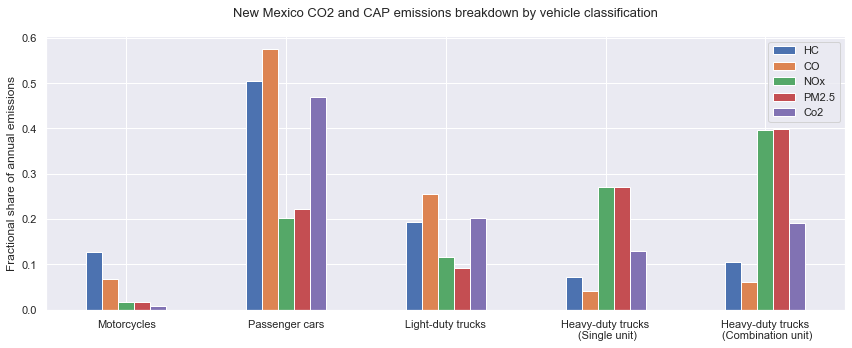

In [121]:
sns.set()
fig, ax = plt.subplots(1,1,figsize=(12,5))
(nmemissions_normalized).plot.bar(ax=ax)
ax.set_xticklabels(nmemissions_normalized.index, rotation=0)
ax.set_ylabel('Fractional share of annual emissions')
ax.set_title('New Mexico CO2 and CAP emissions breakdown by vehicle classification', fontsize = 13, pad= 20)
plt.tight_layout()
#fig.savefig(('figures/nm_TransporationEmissions_byVehicleClassification_percent.png'), bbox_inches='tight', transparent=False,dpi=80)


In [122]:
colors = sns.color_palette(n_colors=len(pollutants))

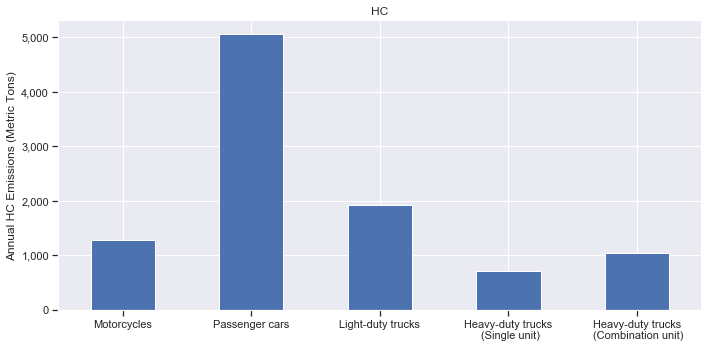

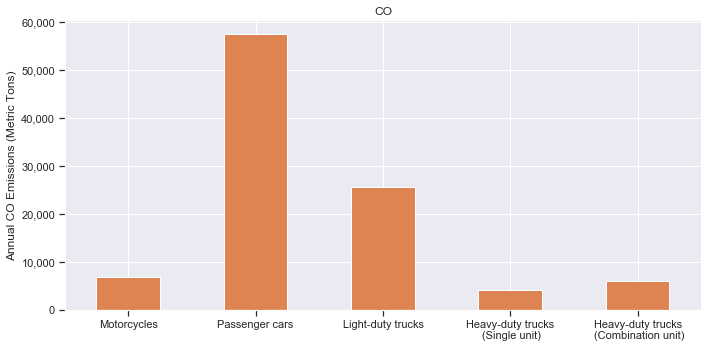

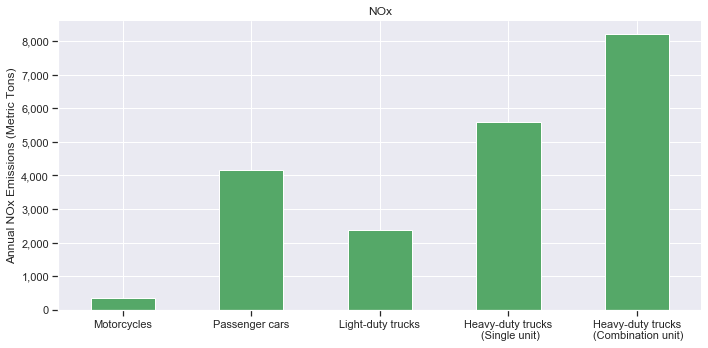

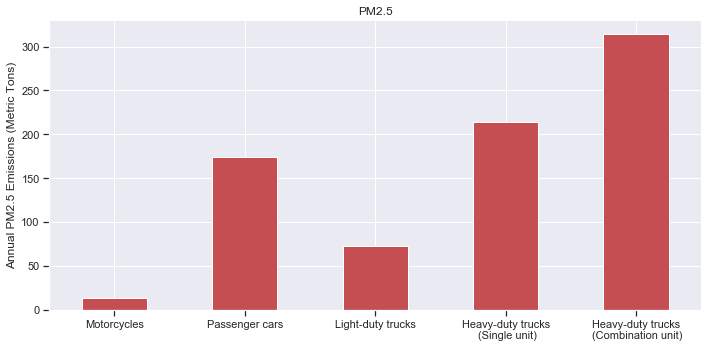

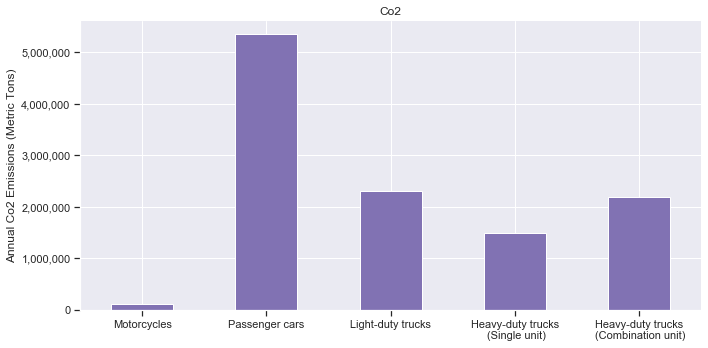

In [126]:
for i,pol in enumerate(pollutants):
    fig, ax = plt.subplots(1,1)
    agg_nmemissions.T.plot(kind ='bar', y=str(pol), figsize=(10,5), ax=ax, legend=False, color=colors[i], rot=0)
    ax.ticklabel_format(style='plain', axis='y')
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_xlabel('')
    ax.set_ylabel('Annual {} Emissions (Metric Tons)'.format(str(pol)))
    ax.set_title(str(pol))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.tight_layout()
    #fig.savefig(('figures/nm_transporationEmissions_byVehicleClassification_mass_{}.png'.format(pol)), bbox_inches='tight', transparent=False,dpi=80)

# fig.suptitle("New Mexico Annual CO2 and CAP emissions by vehicle classification", y=1.02)
# plt.subplots_adjust(bottom=0.3)




In [128]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pollutants_nmemissions

,HC,CO,NOx,PM2.5,Co2
0,1273.707,6799.114,359.983,13.017,99906.414
1,5046.043,57361.668,4168.298,174.563,5342795.047
2,1922.987,25494.069,2383.791,72.197,2301823.607
3,90.798,522.520,713.652,27.305,189701.455
4,467.988,2693.166,3678.298,140.736,977757.091
5,115.875,666.833,910.754,34.847,242094.529
6,35.294,203.107,277.401,10.614,73738.074
7,193.877,1115.721,1523.840,58.304,405063.946
8,595.085,3424.581,4677.257,178.957,1243298.259
9,59.787,344.063,469.917,17.980,124912.355


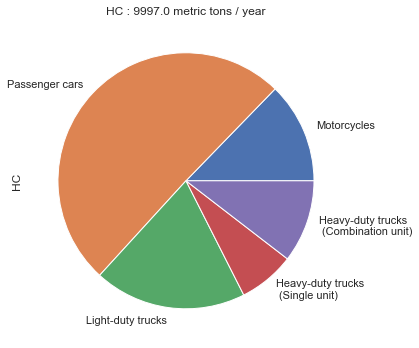

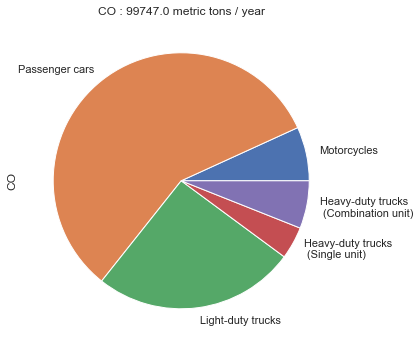

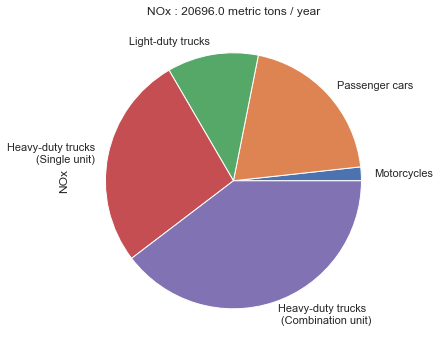

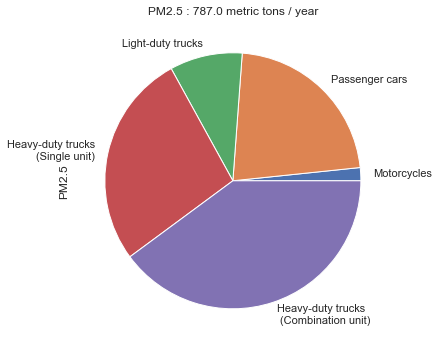

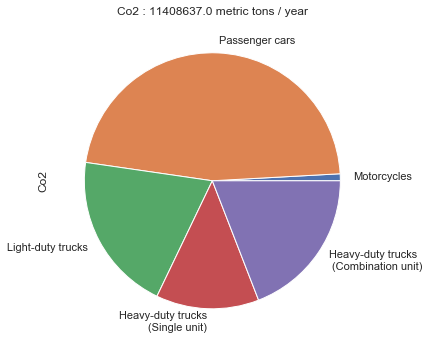

In [136]:
for i,pol in enumerate(pollutants):
    fig, ax = plt.subplots(1,1)
    agg_nmemissions.T.plot.pie(y=str(pol), figsize=(10,5), ax=ax, legend=False, rot=0)
    ax.ticklabel_format(style='plain', axis='y')
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_xlabel('')
    #ax.set_ylabel('Annual {} Emissions (Metric Tons)'.format(str(pol)))
    ax.set_title(str(pol) + ' : ' + str(pollutants_nmemissions[pol].sum().round(0)) + ' metric tons / year')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.tight_layout()
    #fig.savefig(('figures/nm_transporationEmissions_byVehicleClassification_mass_{}.png'.format(pol)), bbox_inches='tight', transparent=False,dpi=80)

# fig.suptitle("New Mexico Annual CO2 and CAP emissions by vehicle classification", y=1.02)
# plt.subplots_adjust(bottom=0.3)